#### Import the libraries

In [2]:
import numpy as np  # matmatical computation
import pandas as pd  # data preprocessing
import matplotlib.pyplot as plt  # visualization
import seaborn as sns  # visualization

#### Feature Description:

Honey Production in USA Dataset:

●	state: Various states of the U.S.

●	numcol: Number of honey-producing colonies.
Honey-producing colonies are the maximum number of colonies from which honey was taken during the year. It is possible to take honey from colonies that did not survive the entire year

●	yieldpercol: Honey yield per colony. Unit is pounds

●	totalprod: Total production (numcol x yieldpercol). Unit is pounds

●	stocks: Refers to stocks held by producers. Unit is pounds

●	priceperlb: Refers to an average price per pound based on expanded sales. The unit is dollars.

●	prodvalue: Value of production (totalprod x priceperlb). The unit is dollars.

●	year: Year of production


#### Read the Dataset

In [3]:
df = pd.read_csv('honeyproduction 1998-2021.csv')
df.head()

,State,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,Arizona,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,Arkansas,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,California,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,Colorado,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [6]:
df.shape
# rows = 985, cols = 8

(985, 8)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   State        985 non-null    object 
 1   numcol       985 non-null    float64
 2   yieldpercol  985 non-null    int64  
 3   totalprod    985 non-null    float64
 4   stocks       985 non-null    float64
 5   priceperlb   985 non-null    float64
 6   prodvalue    985 non-null    float64
 7   year         985 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 61.7+ KB


In [13]:
df.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,985.000000,985.000000,9.850000e+02,9.850000e+02,985.000000,9.850000e+02,985.000000
mean,62892.385787,58.402030,4.035132e+06,1.167187e+06,1.969594,5.939911e+06,2009.291371
std,94163.791917,19.291695,6.752290e+06,2.088589e+06,1.177922,9.806595e+06,6.962251
min,2000.000000,3.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,9000.000000,45.000000,4.690000e+05,1.080000e+05,1.200000,1.037000e+06,2003.000000
50%,26000.000000,55.000000,1.488000e+06,3.600000e+05,1.700000,2.409000e+06,2009.000000
75%,68000.000000,70.000000,3.780000e+06,1.217000e+06,2.360000,5.897000e+06,2015.000000
max,530000.000000,136.000000,4.641000e+07,1.380000e+07,8.230000,8.385900e+07,2021.000000


##### Observations:

1) Number of colonies in every state are spread over a huge range. Ranging from 2000 to 510000.
2) The mean numcol is close to the 75% percentile of the data, indicating a right skew.
3) As expected, standard deviation of numcol is very high
4) yieldpercol - Yield per colony also has huge spread ranging from 19 pounds to 136 pounds.


#### Data preprocessing

##### 1)Handle the Null values

In [7]:
df.isnull().sum()

State          0
numcol         0
yieldpercol    0
totalprod      0
stocks         0
priceperlb     0
prodvalue      0
year           0
dtype: int64

##### 2) Handle Duplicates

In [8]:
df.duplicated().sum()

0

##### 3) Check data types

In [9]:
df.dtypes

State           object
numcol         float64
yieldpercol      int64
totalprod      float64
stocks         float64
priceperlb     float64
prodvalue      float64
year             int64
dtype: object

#### Q1) How has honey production yield changed from 1998 to 2021?

year
2000    219558000.0
Name: totalprod, dtype: float64


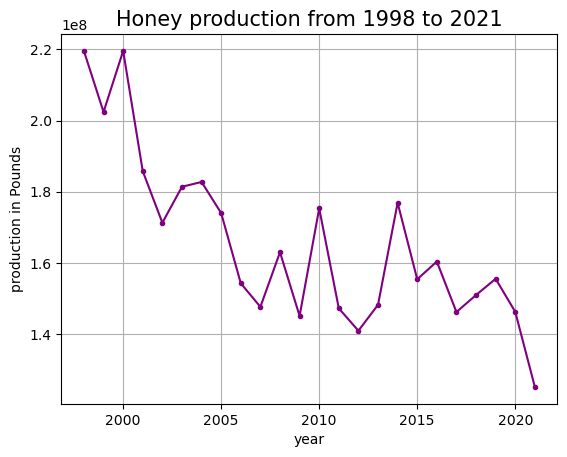

In [10]:
year_wise_prod = df.groupby(by='year')['totalprod'].sum()
print(year_wise_prod.sort_values(ascending=False)[:1]) #printing the heighest value

year_wise_prod.plot(marker='.', color= 'purple')

plt.xlabel('year')
plt.ylabel('production in Pounds')
plt.title('Honey production from 1998 to 2021', fontsize=15)
plt.grid()
plt.show()

##### Insights:
1) In the year 2000, the honey production is highest of all time
2) As we can see from graph, Honey production is decreasing overtime.

#### Q2) Over time, what are the major production trends across the states?

In [14]:
df.State.nunique()

44

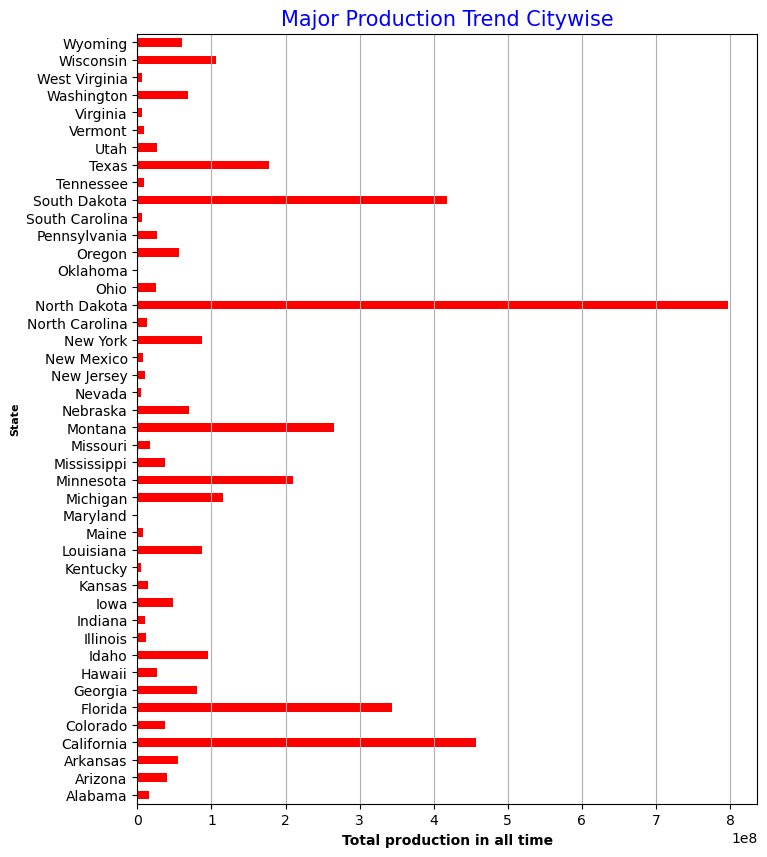

In [4]:
state_wise_max_prod = df.groupby(by='State')['totalprod'].sum()

state_wise_max_prod.sort_values(ascending=False) 
state_wise_max_prod.plot(kind='barh', figsize= [8,10], color = "RED")
plt.grid(axis='x')
plt.title("Major Production Trend Citywise", color='blue', fontsize=15)
plt.xlabel("Total production in all time", weight='bold', fontsize=10)
plt.ylabel("State", weight='bold',fontsize=8)
plt.show()

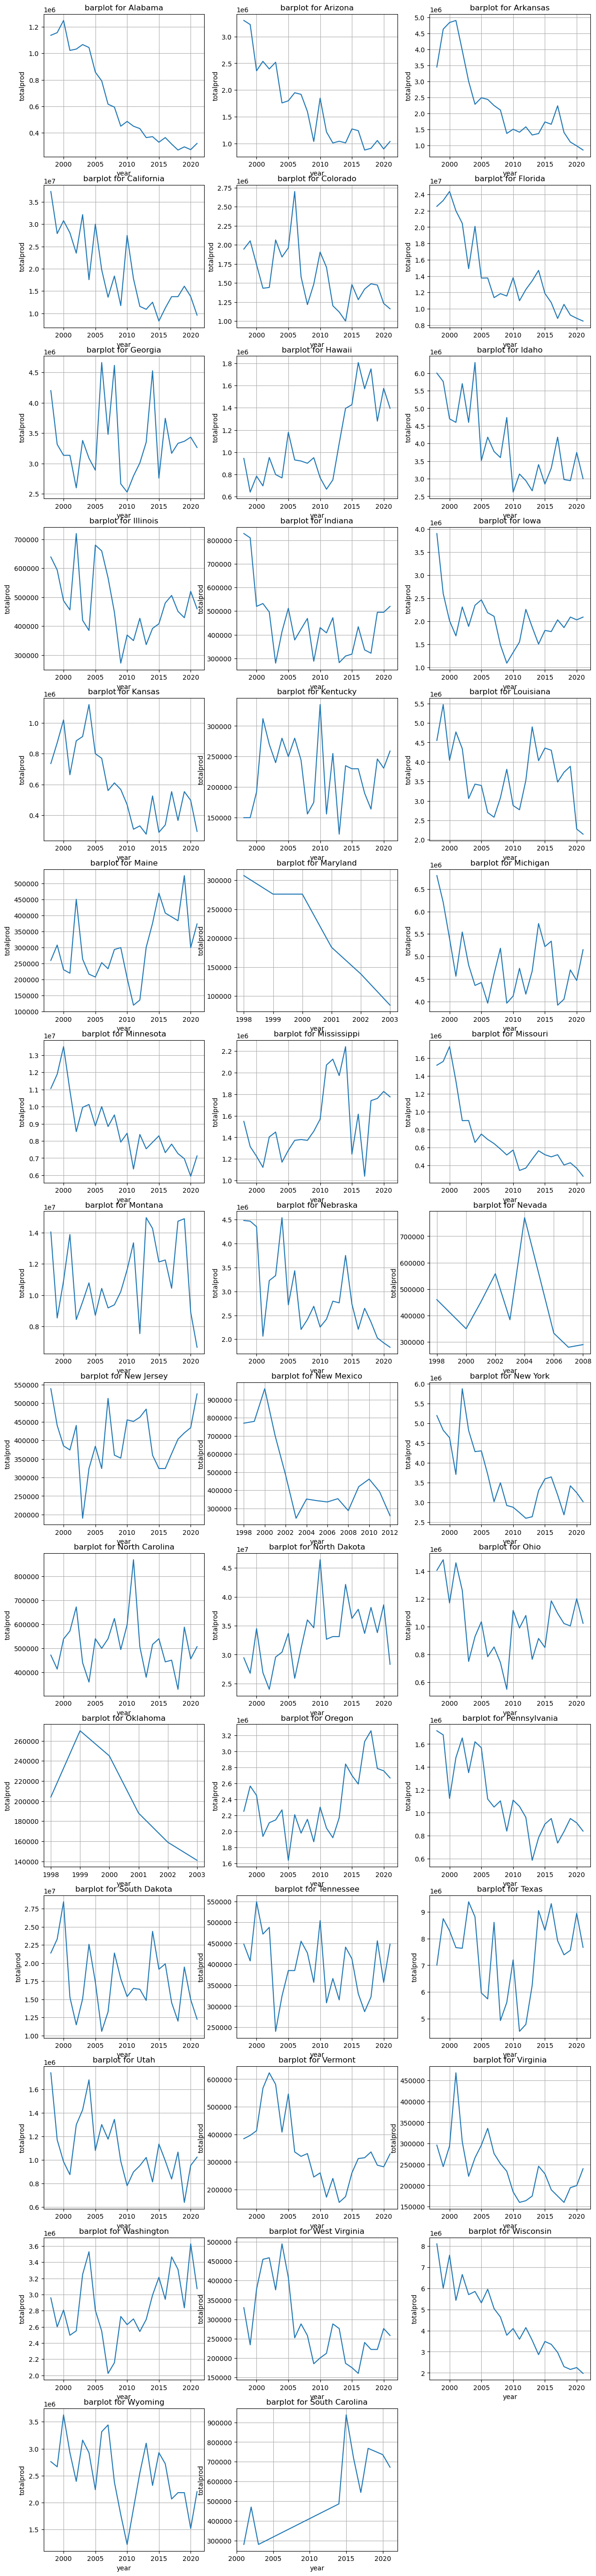

In [5]:
state_count=df.State.nunique()
state_uniq=df.State.unique()
plt.figure(figsize=(15,70))
for i in range(0,state_count):
    plt.subplot(15,3,i+1)
    df_st=df[df['State']==state_uniq[i]][['totalprod','year']]
    sns.lineplot(x='year',y='totalprod',data=df_st)
    plt.title(f'barplot for {state_uniq[i]}')
    plt.grid()
plt.show()


C:\Users\Sadhana\AppData\Local\Temp\ipykernel_6416\3442700200.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='year', y='totalprod', data=df, estimator=sum, ci=None, hue = 'State')


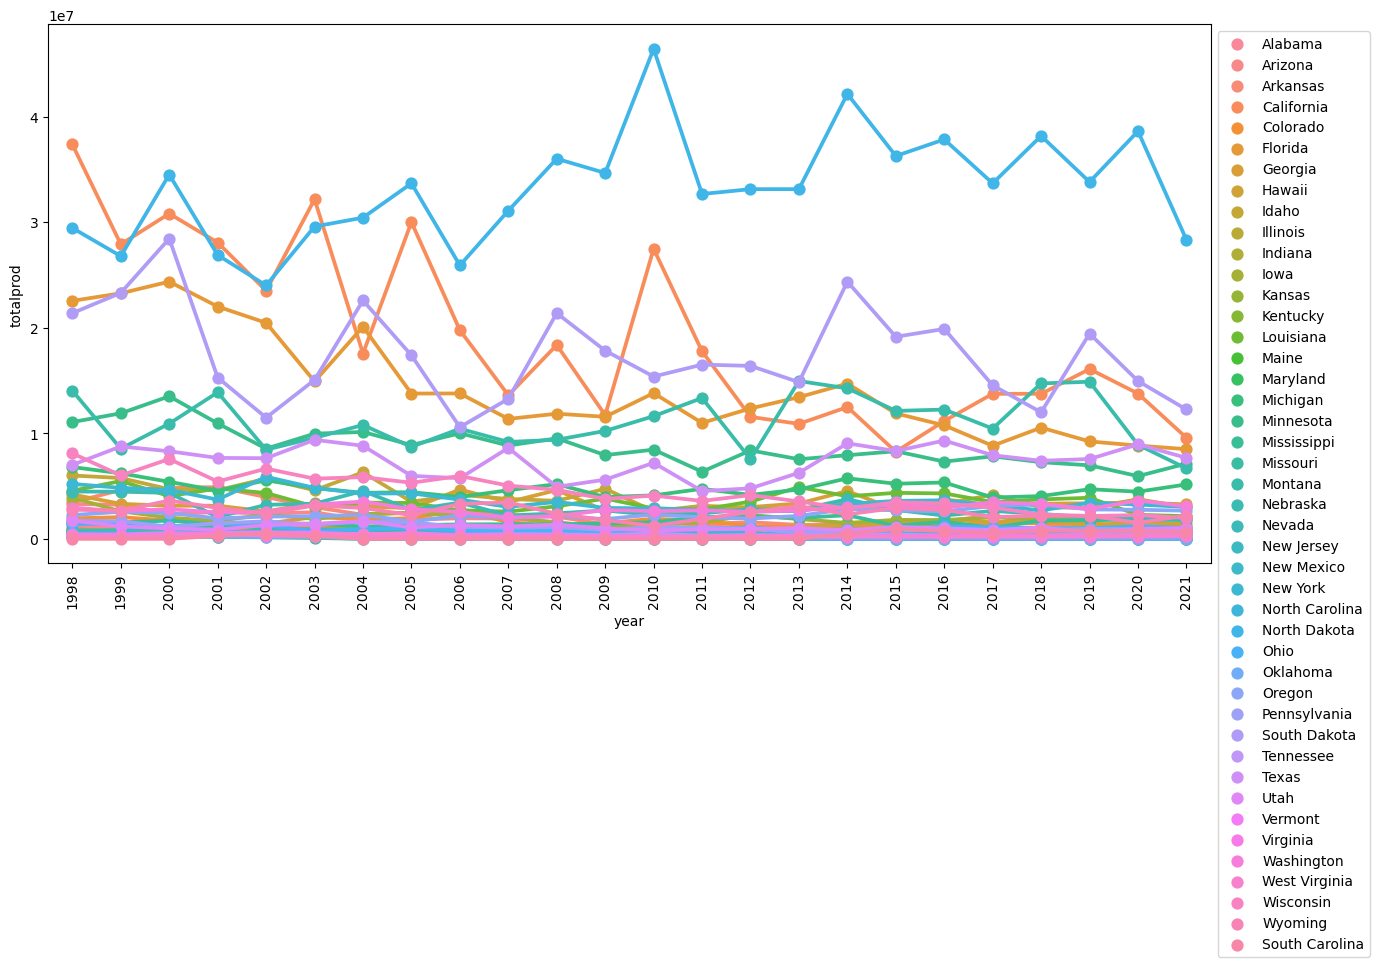

In [18]:
# Add hue parameter to the pointplot to plot for each state
plt.figure(figsize=(15, 7)) # To resize the plot
sns.pointplot(x='year', y='totalprod', data=df, estimator=sum, ci=None, hue = 'State')
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=90) # To rotate the x axis labls
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


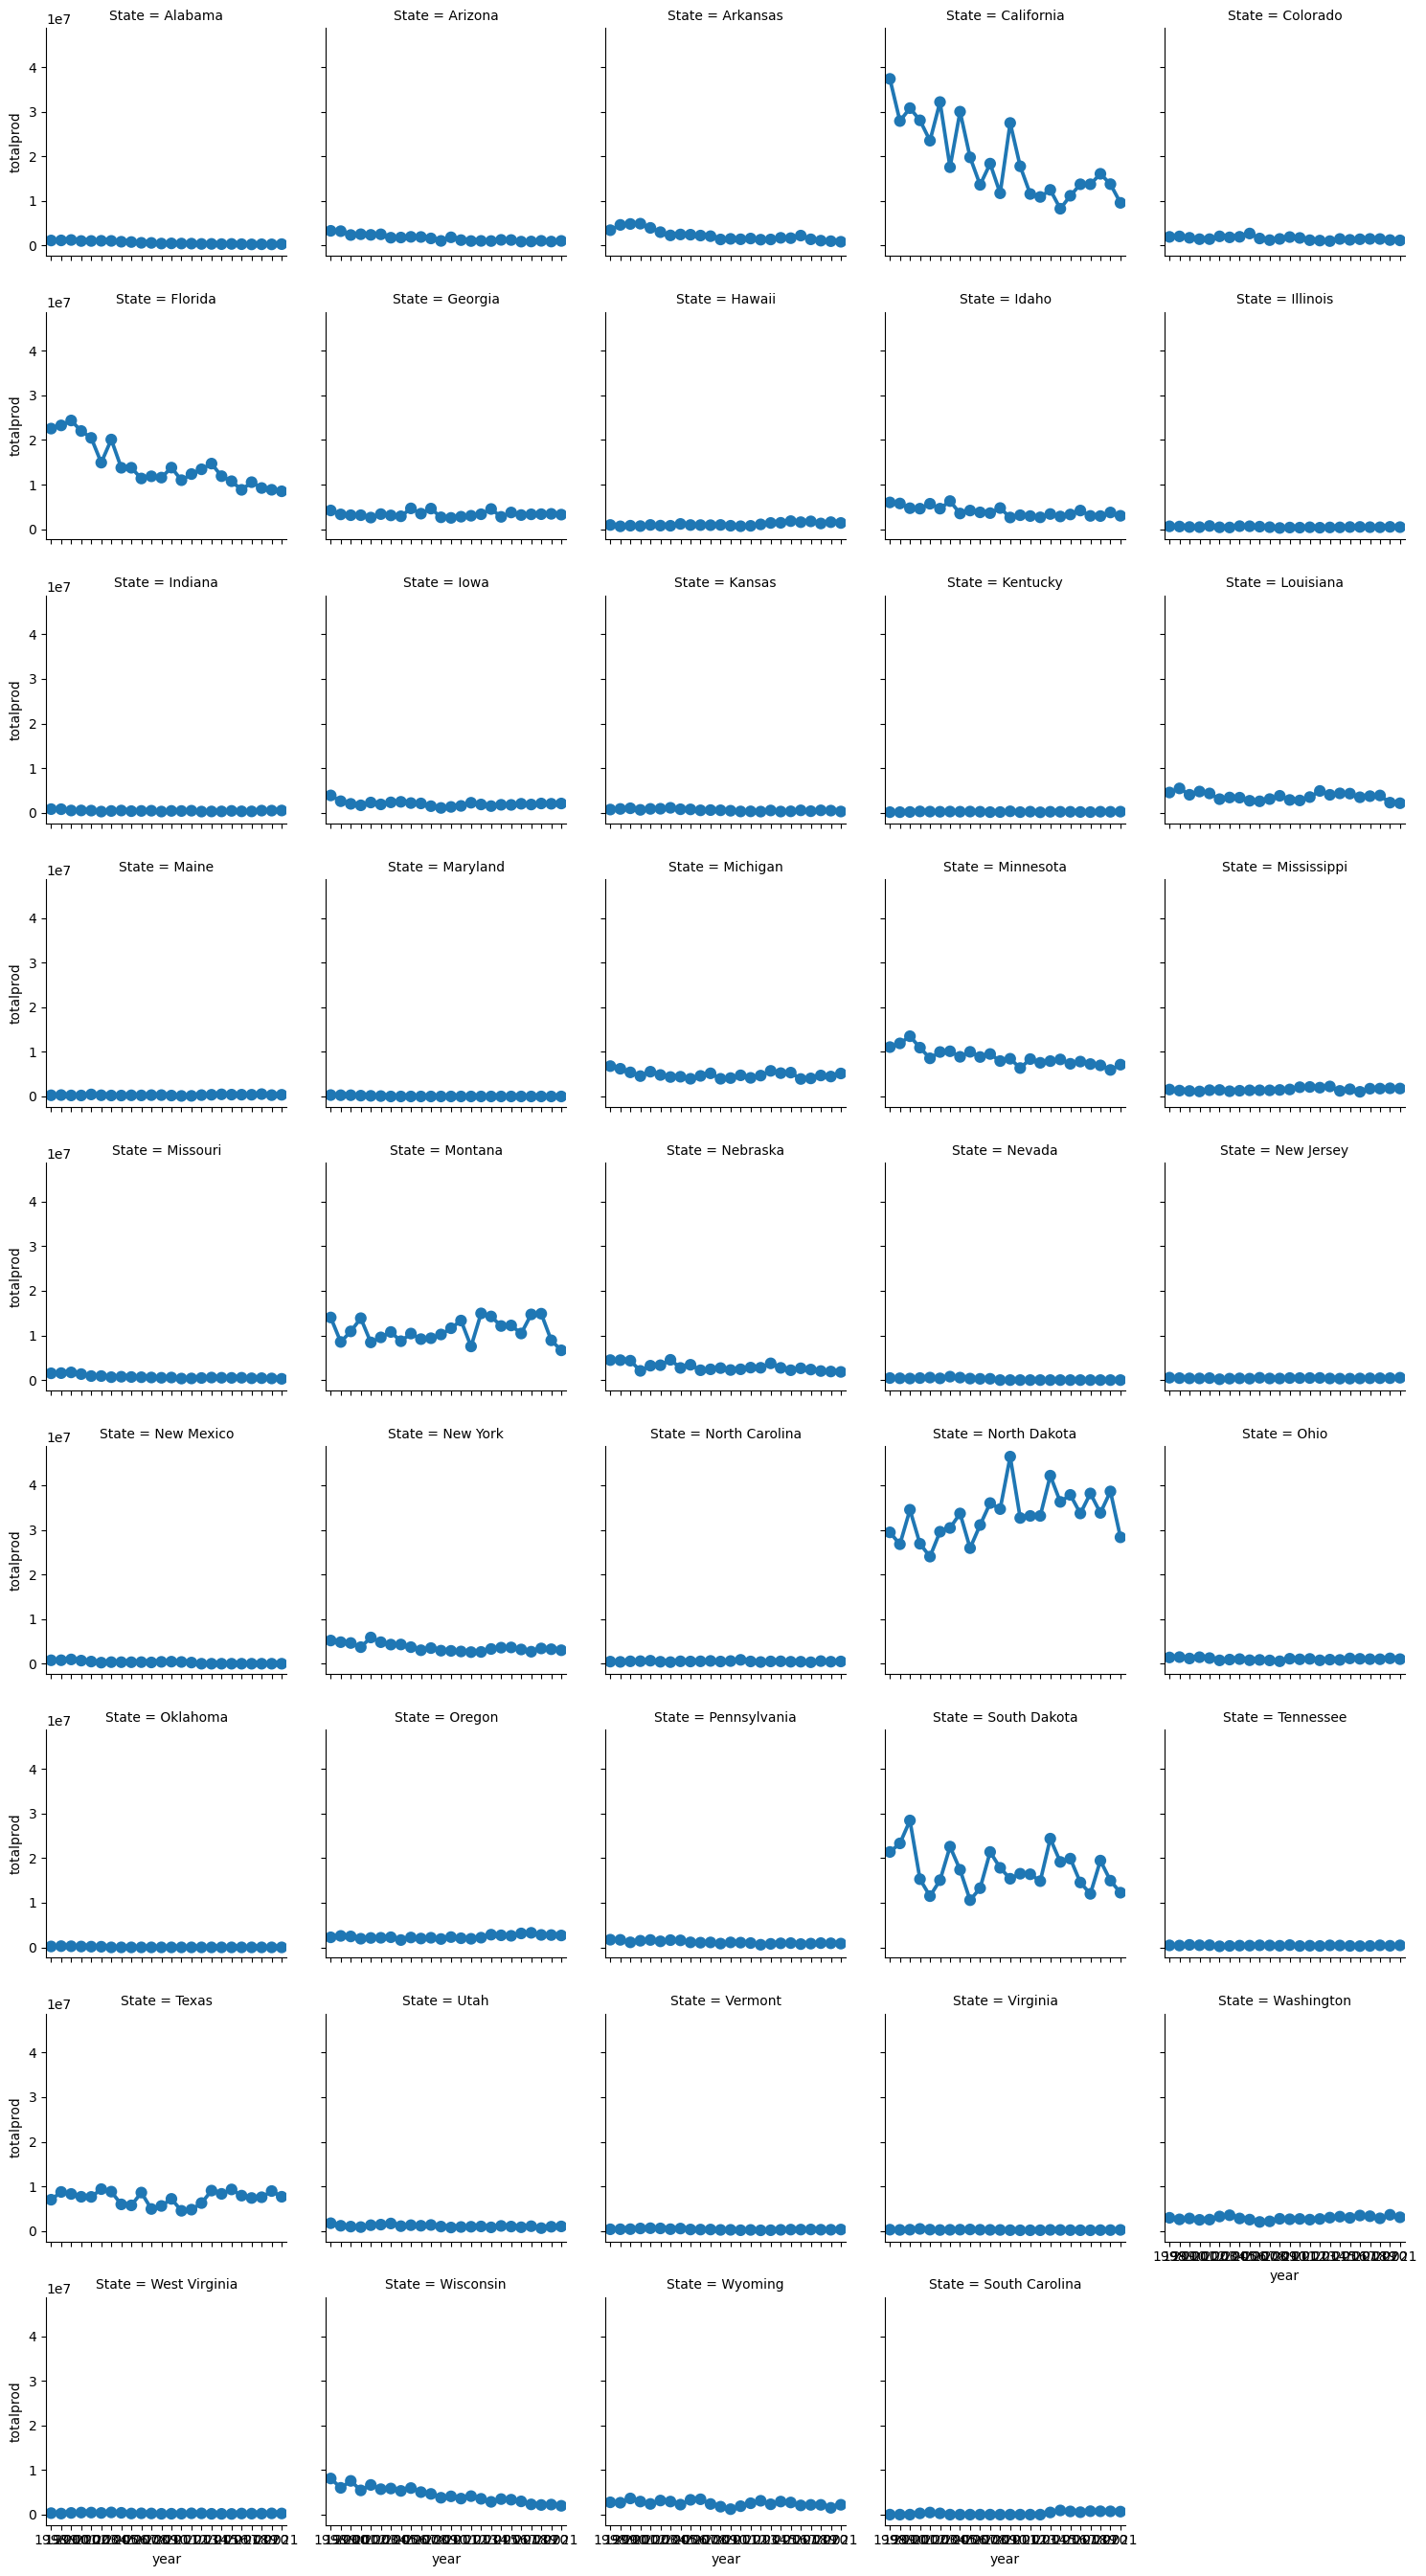

In [34]:
sns.catplot(x='year', y='totalprod', data=df,
                estimator=sum, col='State', kind="point",
                height=3,col_wrap = 5)
plt.show()

Insights:

    1. The most prominent honey producing states of US are - California, Florida, North Dakota and South Dakota and Montana
    2. Unfortunately, the honey production in California has seen a steep decline over the years.
    3. Florida's total production also has been on a decline.
    4. South Dakota has more of less maintained its levels of production.
    5. North Dakota has actually seen an impressive increase in the honey production.

#### Q3) Does the data show any trends in terms of the number of honey-producing colonies and yield per colony before 2006, which was when concern over Colony Collapse Disorder spread nationwide?


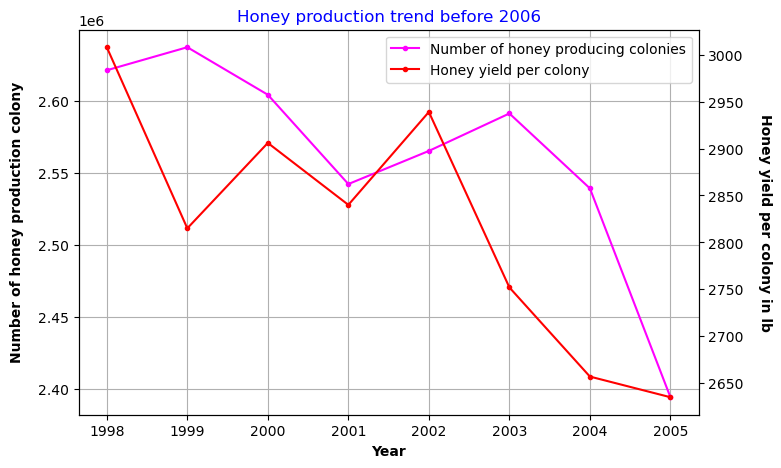

In [35]:


before_2006 = df.loc[df.year<2006]

fig, ax1 = plt.subplots(figsize=[8,5])
 
ln1 = ax1.plot(before_2006.groupby(by='year')['numcol'].sum(), color='magenta',marker='.', label='Number of honey producing colonies')
ax1.xaxis.grid()
ax1.yaxis.grid()

ax2 = ax1.twinx()
ln2 = ax2.plot(before_2006.groupby(by='year')['yieldpercol'].sum(), color='red', marker='.', label='Honey yield per colony')

# getting all the labels
lines = ln1+ln2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels)

plt.title("Honey production trend before 2006", color='blue')
ax1.set_xlabel("Year", weight='bold')
ax1.set_ylabel("Number of honey production colony",labelpad= 10,weight='bold')
ax2.set_ylabel("Honey yield per colony in lb",rotation=-90, labelpad=20, weight='bold')

plt.show()
     

Insights:
   1. We can see that from the graph, before the year 2006 number of honey producing colonies are decreasing in number year by year.
   2. As the number of colonies are decreasing, so the honey producing is also decreasing year by year.
   3. Though it seems that the last point for Number of honey producing colonies and honey yield per colony merged with each other but they have completely different values.

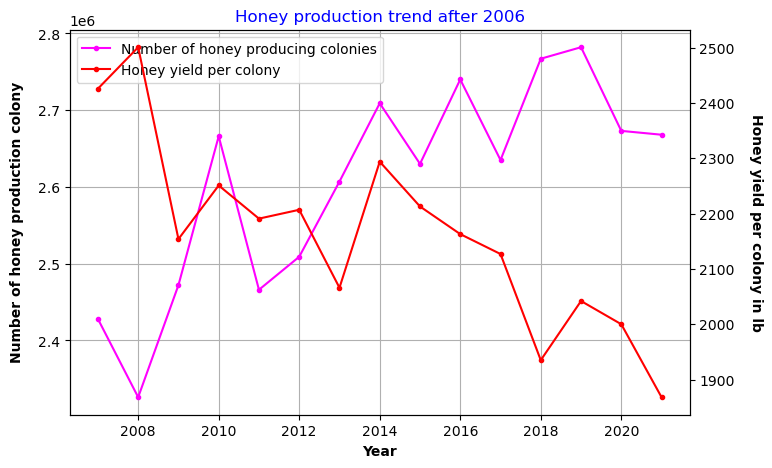

In [36]:
after_2006 = df.loc[df.year>2006]

fig, ax1 = plt.subplots(figsize=[8,5])
 
ln1 = ax1.plot(after_2006.groupby(by='year')['numcol'].sum(), color='magenta',marker='.', label='Number of honey producing colonies')
ax1.xaxis.grid()
ax1.yaxis.grid()

ax2 = ax1.twinx()
ln2 = ax2.plot(after_2006.groupby(by='year')['yieldpercol'].sum(), color='red', marker='.', label='Honey yield per colony')

# getting all the labels
lines = ln1+ln2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels)

plt.title("Honey production trend after 2006", color='blue')
ax1.set_xlabel("Year", weight='bold')
ax1.set_ylabel("Number of honey production colony",labelpad= 10,weight='bold')
ax2.set_ylabel("Honey yield per colony in lb",rotation=-90, labelpad=20, weight='bold')

plt.show()

#### Q4)Are there any patterns that can be observed between total honey production and the value of production every year?

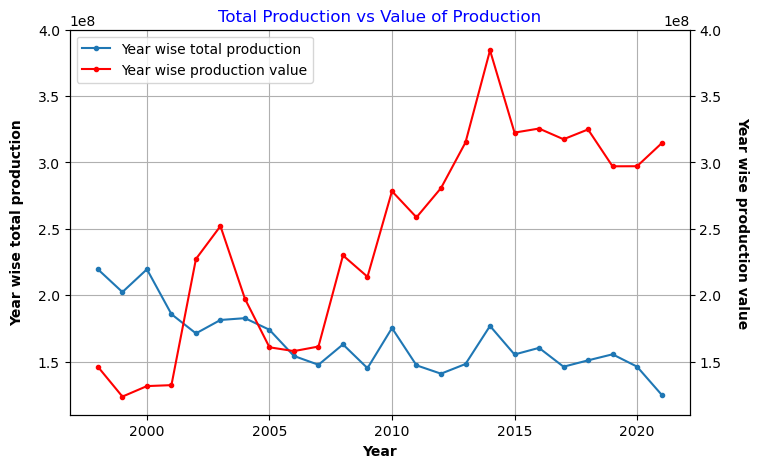

In [37]:

year_wise_totalprod = df.groupby(by='year')['totalprod'].sum()
year_wise_prodvalue = df.groupby(by ='year')['prodvalue'].sum()

fig, ax3 = plt.subplots(figsize=[8,5])

ln1 = ax3.plot(year_wise_totalprod.index, year_wise_totalprod.values,marker='.', label ="Year wise total production")
ax3.set_ylim((1.1*pow(10,8)), (4*pow(10,8)))

ax4 = ax3.twinx()

ln2 = ax4.plot(year_wise_prodvalue.index, year_wise_prodvalue.values , color='red',marker='.', label= "Year wise production value")
ax4.set_ylim((1.1*pow(10,8)), (4*pow(10,8)))

ax3.xaxis.grid()
ax3.yaxis.grid()

lines = ln1 + ln2
labels = [l.get_label() for l in lines]
ax3.legend(lines, labels, loc='upper left')


plt.title("Total Production vs Value of Production", color='blue')
ax3.set_xlabel("Year", weight='bold')
ax3.set_ylabel("Year wise total production",labelpad= 10,weight='bold')
ax4.set_ylabel("Year wise production value",rotation=-90, labelpad=20, weight='bold')
plt.show()

#### Insights:

1. In the chart we can see, the total honey production per year goes down i.e. the honey production is decreasing.
2. As the production is decreasing, the value of production is increasing year by year.
3. Heighest value of production comes in the year 2014 and the lowest is in 1999.

#### Q5)How has the value of production, which in some sense could be tied to demand, changed every year?

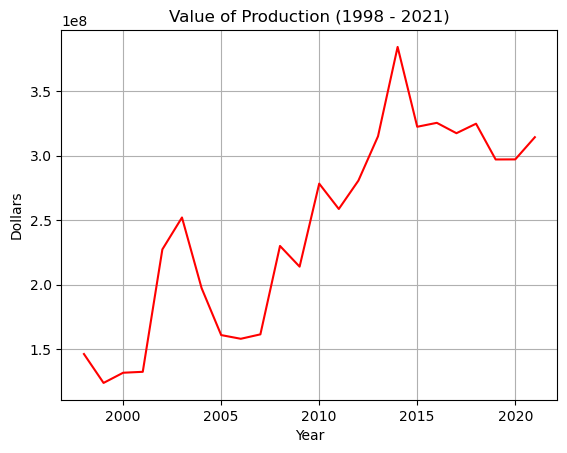

In [38]:
plt.plot(year_wise_prodvalue.index, year_wise_prodvalue.values , color='red')

plt.title("Value of Production (1998 - 2021)")
plt.xlabel("Year")
plt.ylabel("Dollars")
plt.grid()
plt.show()
     

#### Insights:

We can state from the graph that the demand is increasing year by year and as the production is not upto mark so the price is increasing year by year.